In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

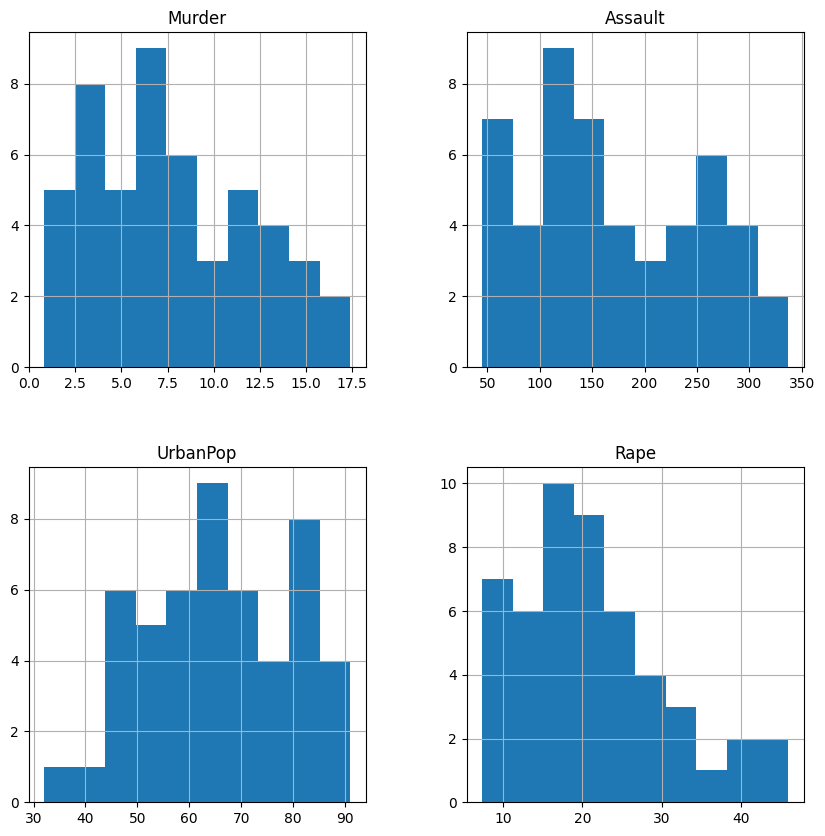

In [5]:
df.hist(figsize=(10,10))


In [6]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [7]:
k_fit = kmeans.fit(df)

In [8]:
k_fit.n_clusters

4

In [9]:
k_fit.cluster_centers_

array([[ 11.48461538, 223.46153846,  70.53846154,  27.30769231],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 12.07777778, 292.        ,  63.66666667,  29.28888889],
       [  5.66111111, 132.11111111,  69.33333333,  18.21666667]])

In [10]:
k_fit.labels_

array([0, 2, 2, 0, 2, 0, 3, 0, 2, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0,
       1, 2, 0, 3, 3, 0, 1, 3, 2, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 0, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

## Kümelerin Görselleştirilmesi

In [11]:
k_means = KMeans(n_clusters=2).fit(df)

In [12]:
kumeler = k_means.labels_

In [13]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

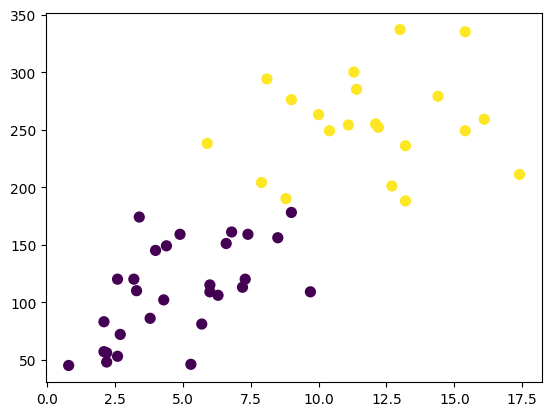

In [16]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap = "viridis");

In [17]:
merkezler = k_means.cluster_centers_

In [18]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

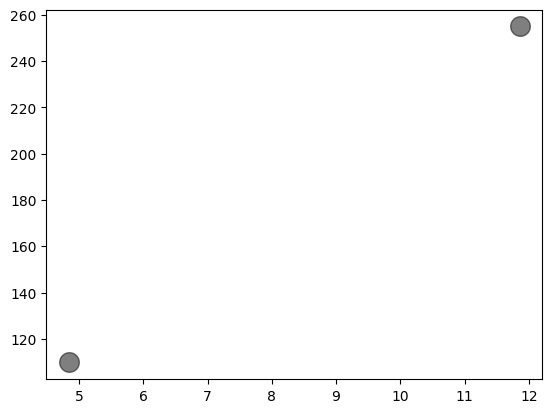

In [19]:
plt.scatter(merkezler[:,0],merkezler[:,1],c="black", s=200,alpha=0.5);

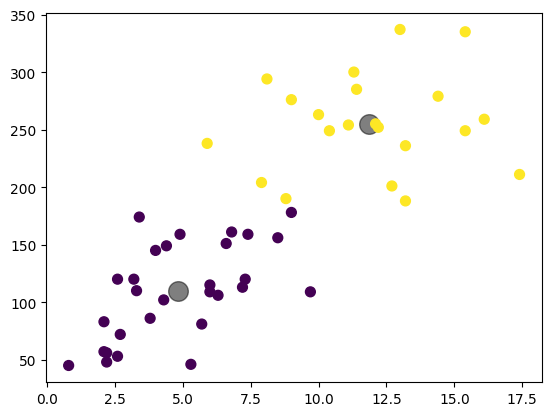

In [20]:
plt.scatter(merkezler[:,0],merkezler[:,1],c="black", s=200,alpha=0.5);
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap = "viridis");

# Optimum Küme Sayısının Belirlenmesi
## Elbow yöntemi

In [24]:
ssd = []

K = range(1,30)

for i in K:
    kmeans = KMeans(n_clusters=i).fit(df)
    ssd.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'Optimum Küme Sayısı için Elbow Yöntemi')

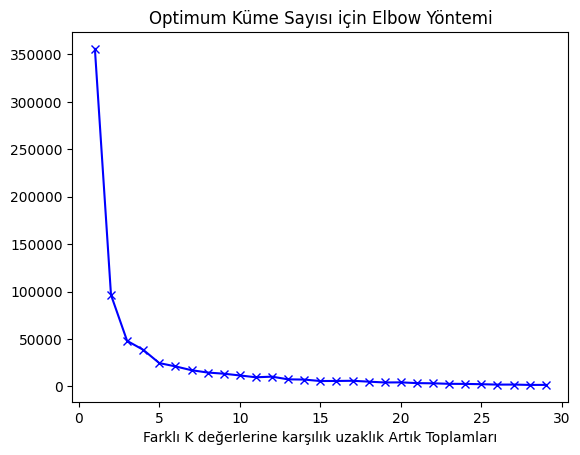

In [25]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K değerlerine karşılık uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi")

In [26]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 6.1 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
from yellowbrick.cluster import KElbowVisualizer

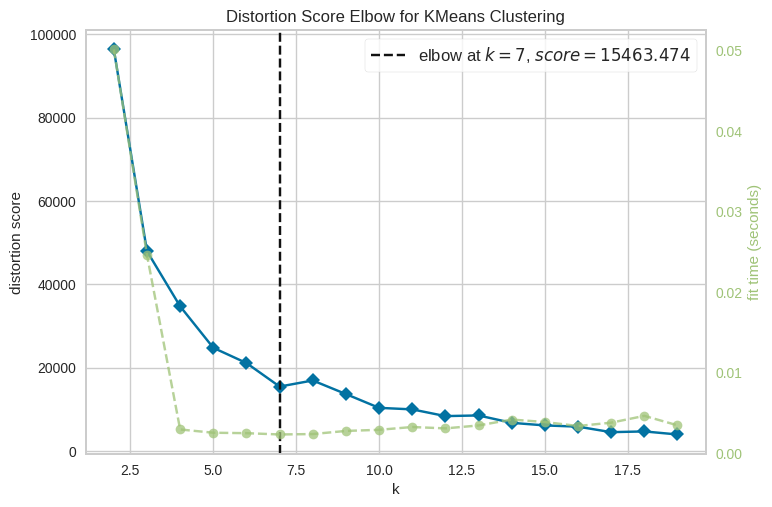

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2,20))
visu.fit(df)
visu.poof()

In [30]:
kmeans = KMeans(n_clusters=4).fit(df)
kmeans

KMeans(n_clusters=4)

In [31]:
kumeler = kmeans.labels_

In [32]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,3
7,Delaware,0
8,Florida,2
9,Georgia,0


In [33]:
df["Kume_no"] = kumeler

In [34]:
df

,Murder,Assault,UrbanPop,Rape,Kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,0
